In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully")

Libraries imported successfully


In [12]:
# Load dataset
path = "../data/raw/synthetic_stroke_data.csv"
df = pd.read_csv(path)

print("="*80)
print("DATA PREPROCESSING & EXPLORATORY DATA ANALYSIS")
print("="*80)
print(f"\nOriginal dataset shape: {df.shape}")

DATA PREPROCESSING & EXPLORATORY DATA ANALYSIS

Original dataset shape: (57281, 12)


## Data Preprocessing

In [13]:
print("\n" + "="*80)
print("DATA PREPROCESSING")
print("="*80)

df_processed = df.copy()

# Remove 'Other' gender
df_processed = df_processed[df_processed['gender'] != 'Other'].reset_index(drop=True)
print(f"\nRemoved 'Other' gender. New shape: {df_processed.shape}")

# Handle missing BMI
bmi_missing = df_processed['bmi'].isnull().sum()
df_processed['bmi'].fillna(df_processed['bmi'].median(), inplace=True)
print(f"Filled {bmi_missing} missing BMI values with median")

print(f"\nFinal processed shape: {df_processed.shape}")


DATA PREPROCESSING

Removed 'Other' gender. New shape: (57281, 12)
Filled 2797 missing BMI values with median

Final processed shape: (57281, 12)
Filled 2797 missing BMI values with median

Final processed shape: (57281, 12)


## Exploratory Data Analysis

In [14]:
print("\n" + "="*80)
print("EXPLORATORY DATA ANALYSIS")
print("="*80)

# Categorical features
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'hypertension','heart_disease']
numeric_features = ['age', 'avg_glucose_level', 'bmi']
target_col = 'stroke'

print("\nCategorical Features - Stroke Rate:")
for col in categorical_features:
    cross_tab = pd.crosstab(df_processed[col], df_processed[target_col], margins=True)
    cross_tab['stroke_rate'] = (cross_tab[1] / (cross_tab[0] + cross_tab[1]) * 100).round(2)
    print(f"\n{col}:")
    print(cross_tab)


EXPLORATORY DATA ANALYSIS

Categorical Features - Stroke Rate:

gender:
stroke      0     1    All  stroke_rate
gender                                 
Female  23828  4848  28676        16.91
Male    23745  4860  28605        16.99
All     47573  9708  57281        16.95

ever_married:
stroke            0     1    All  stroke_rate
ever_married                                 
No            14161  2964  17125        17.31
Yes           33412  6744  40156        16.79
All           47573  9708  57281        16.95

ever_married:
stroke            0     1    All  stroke_rate
ever_married                                 
No            14161  2964  17125        17.31
Yes           33412  6744  40156        16.79
All           47573  9708  57281        16.95

work_type:
stroke             0     1    All  stroke_rate
work_type                                     
Children       11872  2316  14188        16.32
Govt_job       11902  2488  14390        17.29
Private        11836  2576  14412    

In [15]:
print("\n" + "-"*80)
print("Numerical Features by Stroke Status")
print("-"*80)
stroke_analysis = df_processed.groupby(target_col)[numeric_features].agg(['mean', 'median', 'std']).round(2)
print(stroke_analysis)


--------------------------------------------------------------------------------
Numerical Features by Stroke Status
--------------------------------------------------------------------------------
          age               avg_glucose_level                   bmi         \
         mean median    std              mean  median    std   mean median   
stroke                                                                       
0       54.01   54.0  20.80            159.98  160.03  51.90  27.55   27.5   
1       54.19   53.7  20.99            159.75  161.51  51.64  27.37   27.5   

              
         std  
stroke        
0       7.03  
1       7.03  


In [16]:
print("\n" + "-"*80)
print("Correlation with Stroke")
print("-"*80)
correlation_with_stroke = df_processed[numeric_features + [target_col]].corr()[target_col].sort_values(ascending=False)
print(correlation_with_stroke)


--------------------------------------------------------------------------------
Correlation with Stroke
--------------------------------------------------------------------------------
stroke               1.000000
age                  0.003109
avg_glucose_level   -0.001624
bmi                 -0.009163
Name: stroke, dtype: float64


## Data Visualization

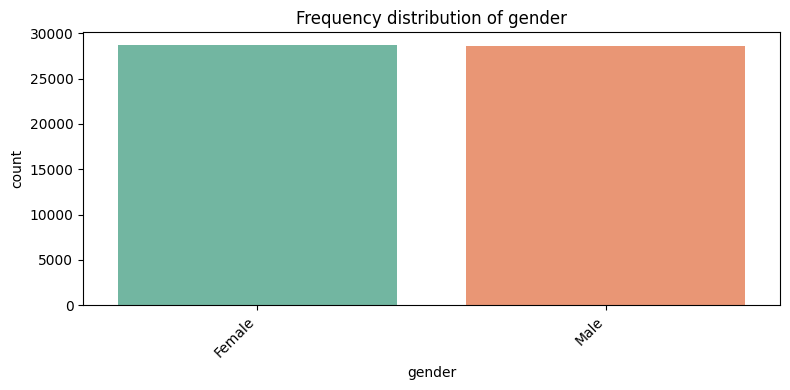

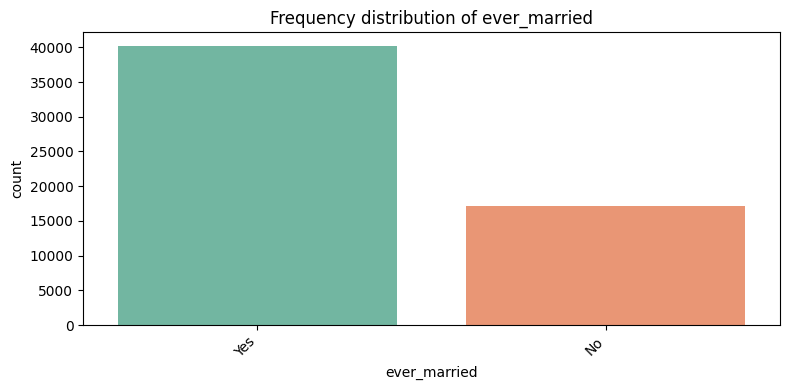

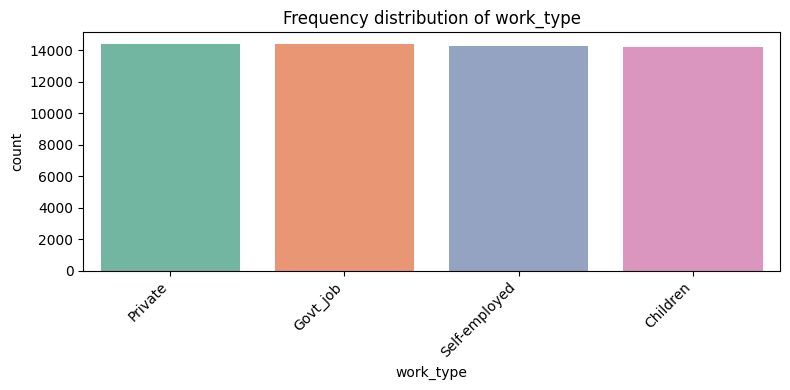

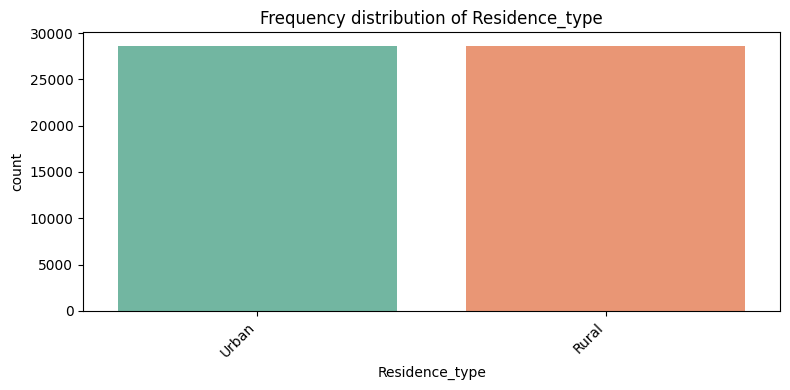

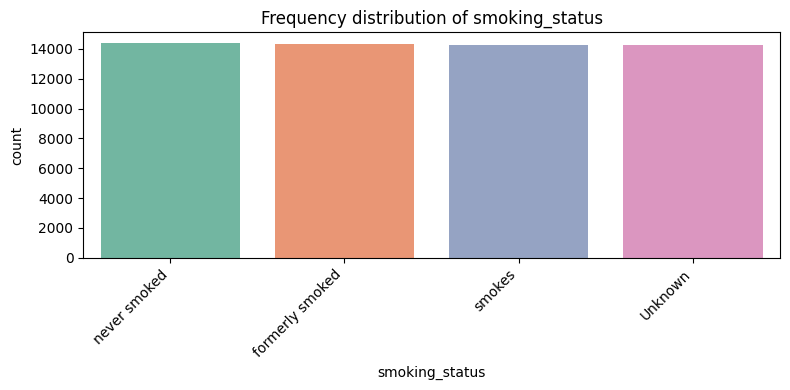

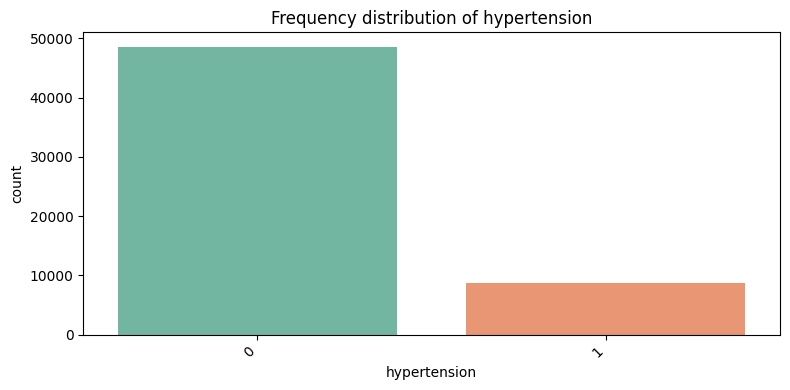

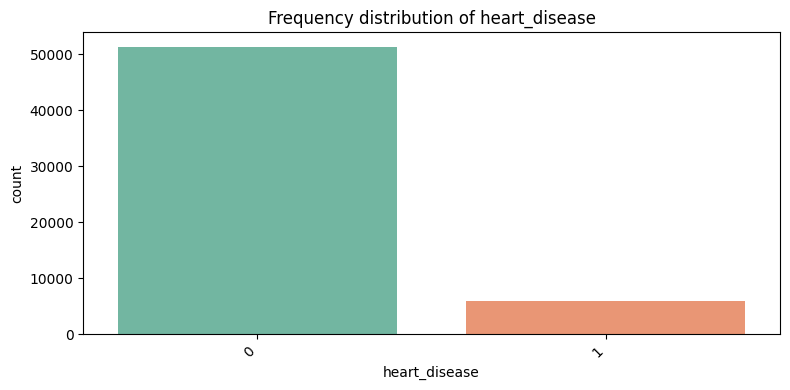

In [17]:
# Categorical feature distributions
for col in categorical_features:  
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df_processed, x=col, order=df_processed[col].value_counts().index, palette="Set2")
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Frequency distribution of {col}')
    plt.tight_layout()
    plt.show()

Descriptive statistics for age:
count    57281.000000
mean        54.041897
std         20.832396
min         18.000000
25%         36.100000
50%         54.000000
75%         72.100000
max         90.000000
Name: age, dtype: float64


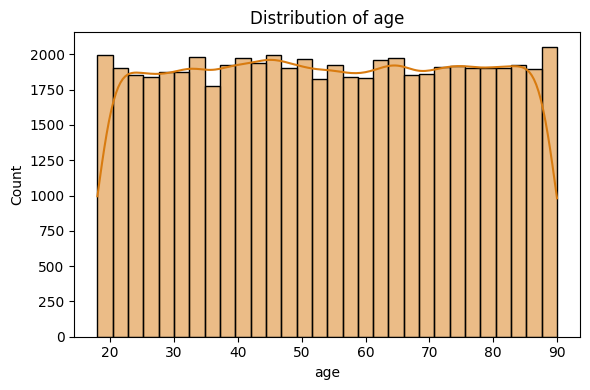

OBSERVATIONS: Distribution of age
- The histogram shows how values of this feature are spread across patients.
- The centre of the bars plus the KDE curve tells us the typical range
  (around the mean/median reported above).
- Very long tails or isolated bars indicate possible outliers or skewed data,
  which is important when we train and evaluate the model.


Descriptive statistics for avg_glucose_level:
count    57281.000000
mean       159.937267
std         51.858107
min         70.010000
25%        114.670000
50%        160.320000
75%        204.960000
max        250.000000
Name: avg_glucose_level, dtype: float64


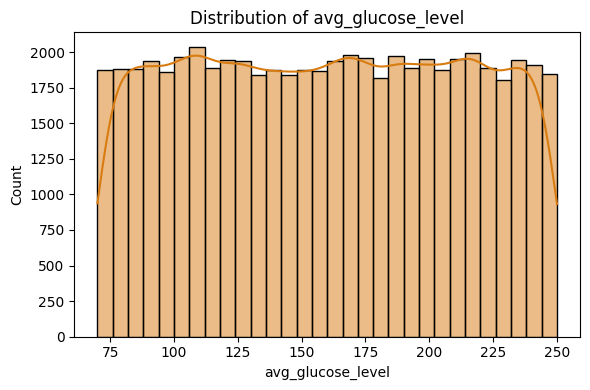

OBSERVATIONS: Distribution of avg_glucose_level
- The histogram shows how values of this feature are spread across patients.
- The centre of the bars plus the KDE curve tells us the typical range
  (around the mean/median reported above).
- Very long tails or isolated bars indicate possible outliers or skewed data,
  which is important when we train and evaluate the model.


Descriptive statistics for bmi:
count    57281.000000
mean        27.517336
std          7.033717
min         15.000000
25%         21.600000
50%         27.500000
75%         33.400000
max         40.000000
Name: bmi, dtype: float64


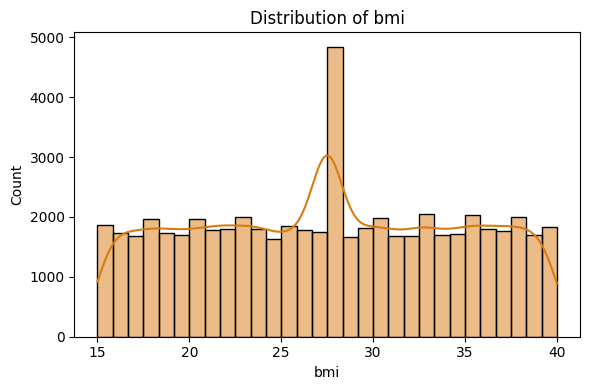

OBSERVATIONS: Distribution of bmi
- The histogram shows how values of this feature are spread across patients.
- The centre of the bars plus the KDE curve tells us the typical range
  (around the mean/median reported above).
- Very long tails or isolated bars indicate possible outliers or skewed data,
  which is important when we train and evaluate the model.




In [18]:
# Numerical feature distributions
for col in numeric_features:
    print(f"Descriptive statistics for {col}:")
    print(df_processed[col].describe())
    
    plt.figure(figsize=(6, 4))
    sns.histplot(df_processed[col], bins=30, kde=True, color="#D87B10", edgecolor="black")
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

    # Simple observations for the class
    print(f"OBSERVATIONS: Distribution of {col}")
    print("- The histogram shows how values of this feature are spread across patients.")
    print("- The centre of the bars plus the KDE curve tells us the typical range")
    print("  (around the mean/median reported above).")
    print("- Very long tails or isolated bars indicate possible outliers or skewed data,")
    print("  which is important when we train and evaluate the model.\n")
    
    print()

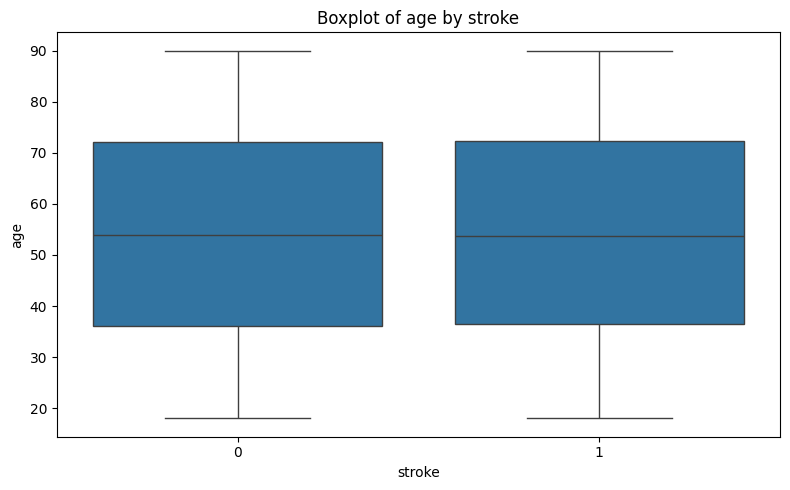

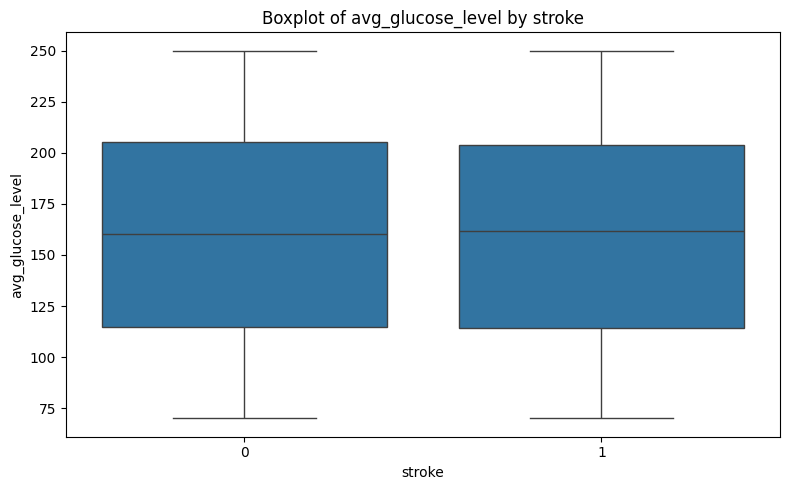

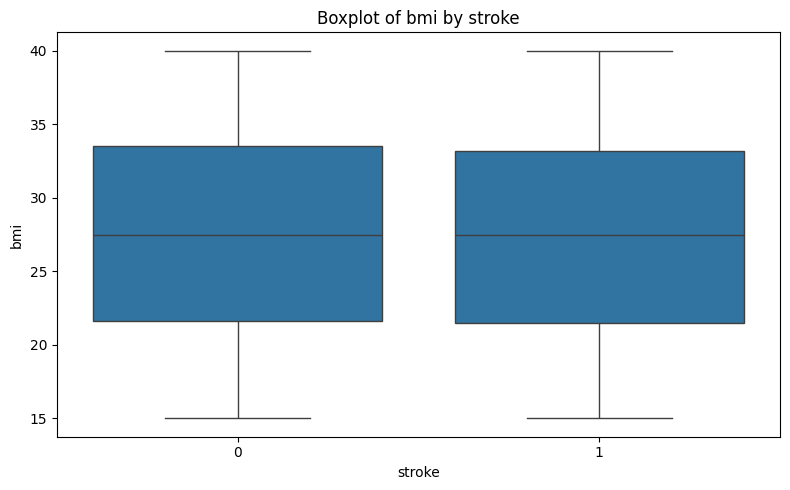

In [ ]:
# Boxplots for numeric features vs target
for col in numeric_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df_processed[target_col], y=df_processed[col])
    plt.title(f'Boxplot of {col} by {target_col}')
    plt.tight_layout()
    plt.show()

    print(f"OBSERVATIONS: Boxplot of {col} by stroke")
    print("- The line inside each box shows the median value for stroke=0 and stroke=1.")
    print("- If the medians and boxes are at similar heights, this feature does not differ much between groups.")
    print("- If one box is clearly higher or lower, that feature may help separate stroke vs non‑stroke.")
    print()

In [ ]:
# Contingency table and stacked bar plot for gender vs stroke
print("\n" + "="*80)
print("CONTINGENCY TABLE: Gender vs Stroke")
print("="*80)

cross_tab = pd.crosstab(df_processed['gender'], df_processed[target_col], margins=True)
print("\nContingency Table between gender and target:\n", cross_tab)

plt.figure(figsize=(8, 5))
cross_tab_norm = cross_tab.div(cross_tab.sum(axis=1), axis=0)
cross_tab_norm.iloc[:-1, :-1].plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])
plt.title(f'Stacked Bar Plot: Gender vs. {target_col}')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.legend(title=target_col, labels=['No Stroke (0)', 'Stroke (1)'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print("\nOBSERVATIONS: Gender vs stroke (stacked bar)")
print("- The height of each bar shows the proportion of stroke vs non‑stroke within each gender.")
print("- Male and female bars look very similar, which means stroke rates are almost the same for both genders.")
print("- So, gender alone is not a strong predictor of stroke in this dataset.")


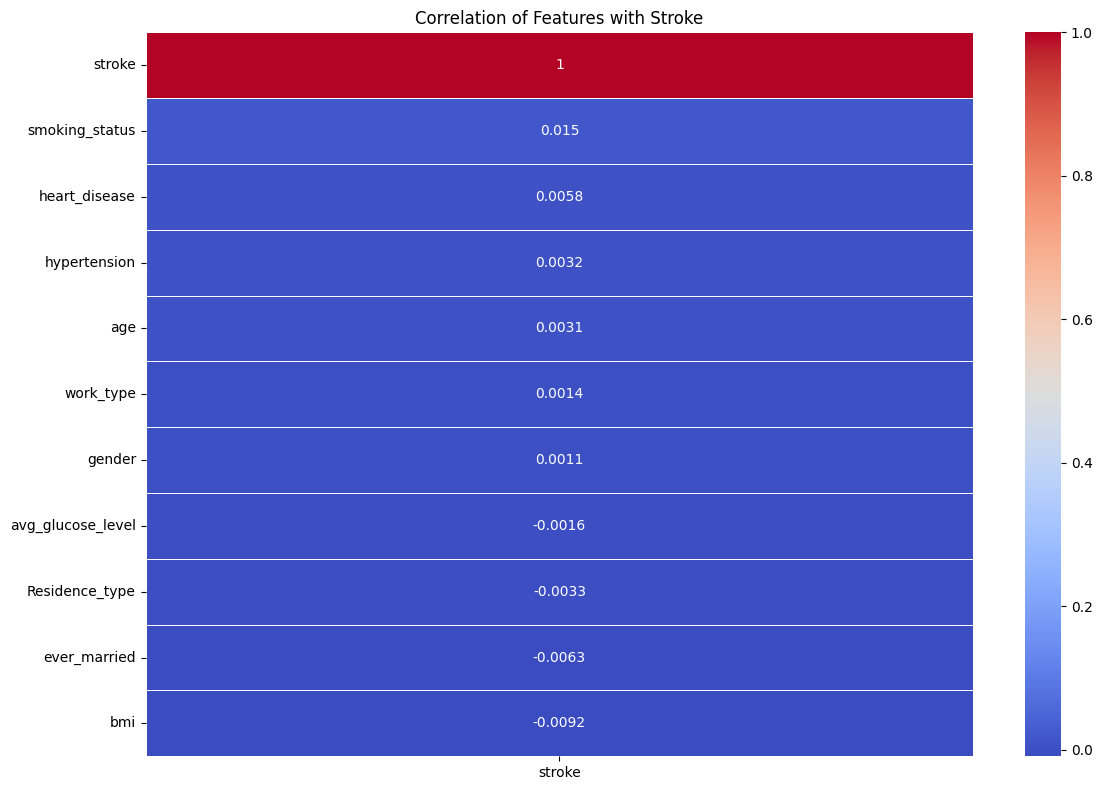

In [20]:
# Correlation heatmap
df_corr = df_processed.copy()
le = LabelEncoder()
for col in categorical_features:
    df_corr[col] = le.fit_transform(df_corr[col].astype(str))

corr_cols = numeric_features + categorical_features + [target_col]
corr_matrix = df_corr[corr_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix[[target_col]].sort_values(by=target_col, ascending=False), 
            annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation of Features with Stroke")
plt.tight_layout()
plt.show()

In [ ]:
# Full correlation heatmap
print("\n" + "="*80)
print("FULL CORRELATION HEATMAP")
print("="*80)

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, cbar_kws={'label': 'Correlation'})
plt.title("Full Correlation Matrix of All Features with Stroke", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nINTERPRETATION:")
print("- Values closer to 1 indicate positive correlation (feature increases when stroke increases)")
print("- Values closer to -1 indicate negative correlation (feature decreases when stroke increases)")
print("- Values close to 0 indicate weak or no linear correlation")


## Key Findings from EDA

- Dataset is evenly distributed across gender, work_type, Residence_type and smoking_status, age, average_glucose_level and BMI. 
- The stroke and non stroke distribution across gender, age, average_glucose_level and BMI is also very similar.
- There are not many outliers in the dataset. Data is very evenly distributed. So, there is no need for any normalisation.
- Key features contritbuting towards stroke - smoking_status, heart_disease, hypertension,age.